In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
#stats 

In [34]:
df = pd.read_csv('./stats.csv')

In [35]:
df

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


In [36]:
renamed_columns = {
  "Timestamp": "survey_timestamp",
  "Your Sex?": "gender",
  "Your Matric (grade 12) Average/ GPA (in %)": "high_school_gpa",
  "What year were you in last year (2023) ?": "year_of_study_2023",
  "What faculty does your degree fall under?": "faculty",
  "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)": "gpa_2023",
  "Your Accommodation Status Last Year (2023)": "accommodation_status_2023",
  "Monthly Allowance in 2023": "monthly_allowance_2023",
  "Were you on scholarship/bursary in 2023?": "scholarship_2023",
  "Additional amount of studying (in hrs) per week": "additional_study_hours",
  "How often do you go out partying/socialising during the week? ": "partying_frequency",
  "On a night out, how many alcoholic drinks do you consume?": "alcohol_consumption_per_outing",
  "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)": "alcohol_related_absences",
  "How many modules have you failed thus far into your studies?": "failed_modules",
  "Are you currently in a romantic relationship?": "in_a_relationship",
  "Do your parents approve alcohol consumption?": "parental_approval_of_alcohol",
  "How strong is your relationship with your parent/s?": "parent_relationship_strength"
}

In [38]:
df = df.rename(columns=renamed_columns)

In [39]:
numeric_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

In [40]:
print(len(numeric_features))
print(len(categorical_features))

2
15


### Tratasmiento de Nulos
- eliminacion
- valores numericos
    - remplazar por la media:no es muy recomendable si hay cantidad significativa de outliers
    - remplazar por la mediana /moda
- Valores categoricos
    - Imputacion :''Unknnow', ''(no set)', repartir categorias

In [ ]:
df['gender'].fillna('not_set', inplace= True) # cambia valores nulos por el nombre que queramos

In [45]:
set(df['gender'])

{'Female', 'Male', 'not_set'}

### Como crear graficos con una funcion

In [46]:
def plot_categorical_countplot(df, column, labelrotation=0):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=column, palette='viridis' )

    plt.xlabel(column, fontsize=10) 
    plt.ylabel('Frecuencia',fontsize=10)
    plt.title(column, fontsize=14)
    plt.show()

C:\Users\Main-PC\AppData\Local\Temp\ipykernel_7992\4051071931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis' )


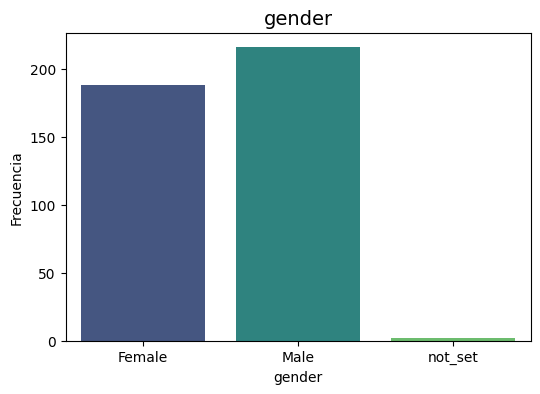

In [49]:
plot_categorical_countplot(df,'gender' )

In [60]:
gender_percentage = df['gender'].value_counts(normalize= True) *100 # metodo que saca porcentanje de una  categoria especifica
print('% de Hombres' ,gender_percentage['Male'])
print('% de Hombres' ,gender_percentage['Female'])

% de Hombres 53.20197044334976
% de Hombres 46.30541871921182


In [62]:
df['high_school_gpa'].describe()

count    399.000000
mean      77.989724
std        7.048618
min       34.000000
25%       74.000000
50%       78.000000
75%       83.000000
max       99.000000
Name: high_school_gpa, dtype: float64

In [67]:
df['high_school_gpa'].fillna(df['high_school_gpa'].median(), inplace = True)

<Axes: xlabel='high_school_gpa', ylabel='Count'>

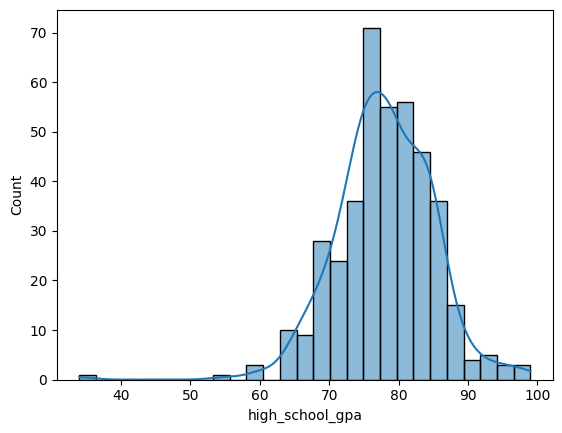

In [70]:
sns.histplot(data=df,x= 'high_school_gpa' ,kde= True)# Histogramas

In [72]:
df['gpa_2023'].describe()# metodo describe

count    320.000000
mean      66.268469
std        9.147906
min       30.000000
25%       60.000000
50%       65.000000
75%       73.000000
max       95.220000
Name: gpa_2023, dtype: float64

In [73]:
df['gpa_2023'].fillna(df['gpa_2023'].median(), inplace = True)

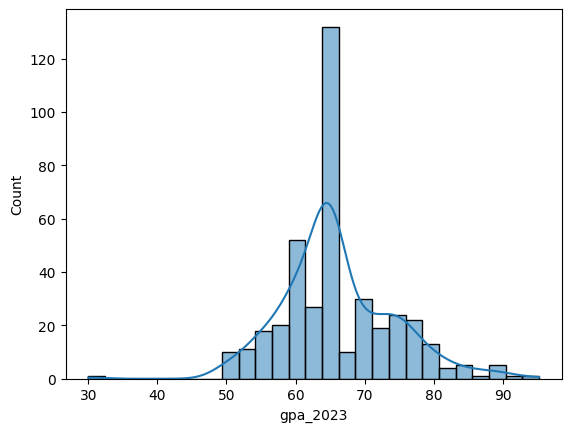

<Axes: xlabel='gpa_2023'>

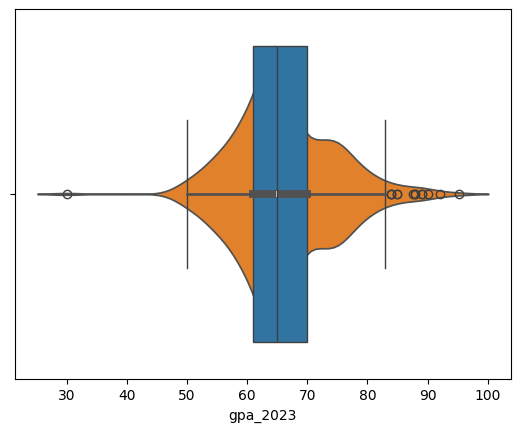

In [79]:
sns.histplot(data=df,x= 'gpa_2023' ,kde= True)
plt.show()
sns.boxplot(data=df,x= 'gpa_2023') #diagrama de caja
sns.violinplot(data=df,x= 'gpa_2023')# diagrama violin

In [ ]:
df['year_of_study_2023'].fillna('not_set', inplace= True)

C:\Users\Main-PC\AppData\Local\Temp\ipykernel_7992\4051071931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis' )


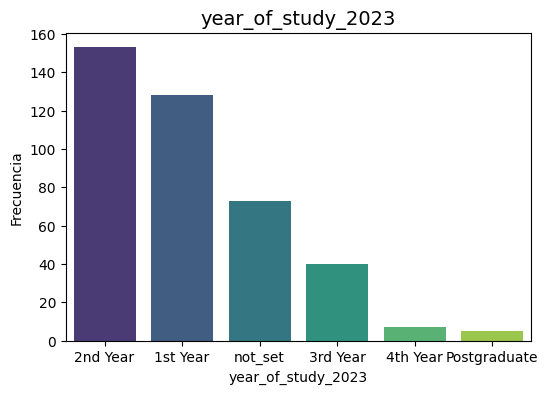

In [77]:
plot_categorical_countplot(df,'year_of_study_2023')

### Hipotesis
- la carrera tiene impactoen las notas de los estudiantes. En carreras de ciencias exactas las notas tienden a ser mas bajas.
- los becados tienen mejores notas.
- a mayor cantidad de horas de estudio, las notas seran mas altas.
- correlacion positiva entre el gpa de la secundaria y en la universidad.
- si el gpa en la secundaria es bajo el alumno no seguira ingenieria o ciencias.
- a mayor consumo de alcohol el gpa sera mas bajo.

In [80]:
df


,survey_timestamp,gender,high_school_gpa,year_of_study_2023,faculty,gpa_2023,accommodation_status_2023,monthly_allowance_2023,scholarship_2023,additional_study_hours,partying_frequency,alcohol_consumption_per_outing,alcohol_related_absences,failed_modules,in_a_relationship,parental_approval_of_alcohol,parent_relationship_strength
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,not_set,Science,65.0,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,65.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,not_set,Economic & Management Sciences,65.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


C:\Users\Main-PC\AppData\Local\Temp\ipykernel_7992\3889940323.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='gpa_2023', y='faculty', palette='Set3' )


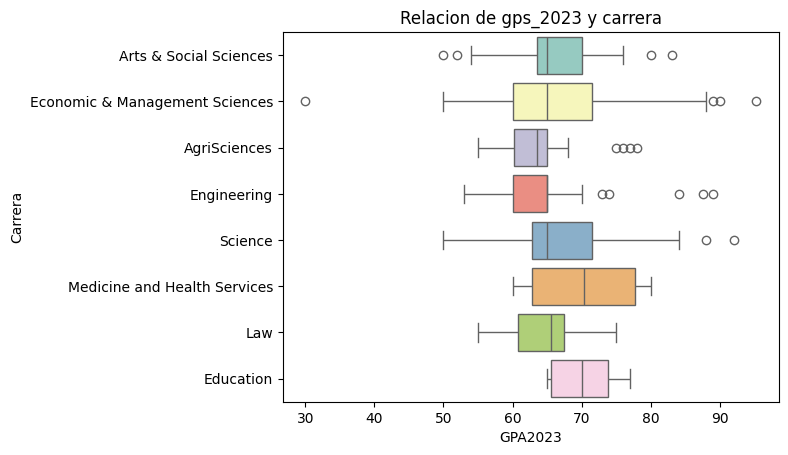

In [87]:
sns.boxplot(data=df,x='gpa_2023', y='faculty', palette='Set3' )
plt.title('Relacion de gps_2023 y carrera')
plt.xlabel('GPA2023')
plt.ylabel('Carrera')
plt.show()

In [88]:
gender_by_faculty = df.groupby(['faculty', 'gender']).size().to_frame(name='count').reset_index()

<Axes: xlabel='faculty', ylabel='count'>

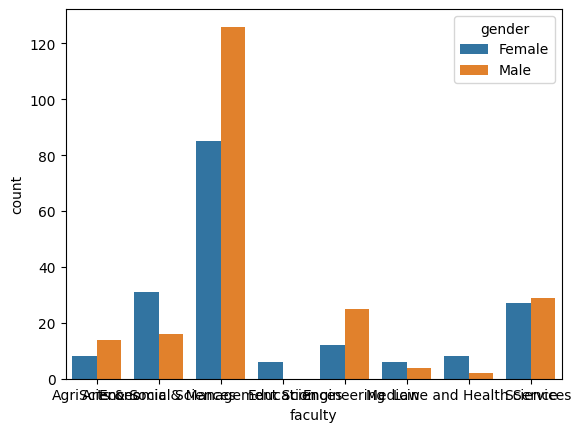

In [89]:
sns.barplot(x='faculty', y='count', hue='gender', data=gender_by_faculty)

In [95]:
df['scholarship_2023'].fillna('no_set' , inplace= True)

scholarship_2023
No                     352
Yes (NSFAS, etc...)     46
no_set                   8
Name: count, dtype: int64

C:\Users\Main-PC\AppData\Local\Temp\ipykernel_7992\4051071931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis' )


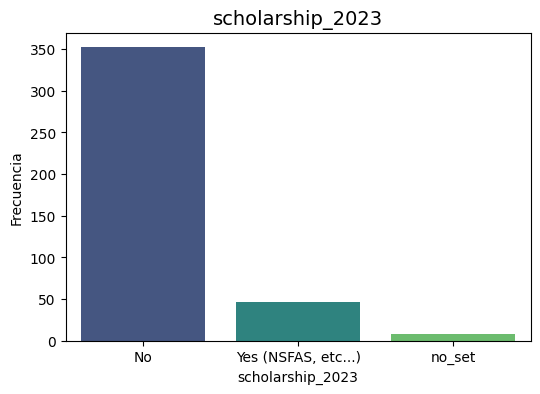

In [101]:
plot_categorical_countplot(df,'scholarship_2023')

C:\Users\Main-PC\AppData\Local\Temp\ipykernel_7992\1431511403.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='scholarship_2023', y='gpa_2023', palette='Set3' )


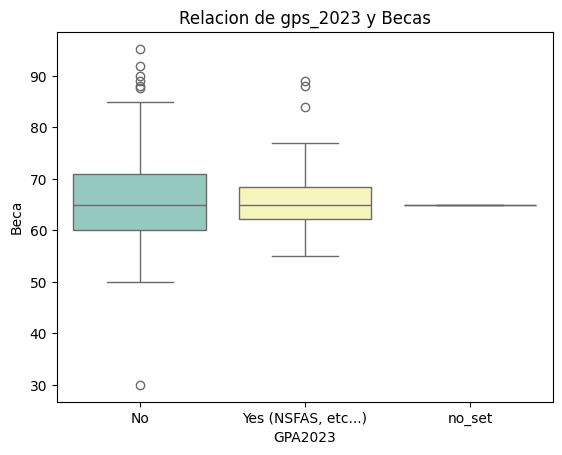

In [104]:
sns.boxplot(data=df,x='scholarship_2023', y='gpa_2023', palette='Set3' )
plt.title('Relacion de gps_2023 y Becas')
plt.xlabel('GPA2023')
plt.ylabel('Beca')
plt.show()